Código para visualização da localização das estações com dados fornecidos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import pickle

import matplotlib

%matplotlib notebook


In [9]:
# diretorios de trabalho
BASE_DIR = '/home/tparente/danilo/mestrado/github/'
DATA_DIR = BASE_DIR + 'dados_bndo/'

In [3]:
# listado arquivos para plotagem
lfiles = glob.glob(DATA_DIR+'*.txt')
lfiles.sort()

len(lfiles)


0

In [4]:
def readFile(fname):
    data = open(fname, 'r')
    data = data.read()
    
    data = data.split('\n')
    
    return data

In [5]:
name = ['Terminal Ilha Guaiba (50165)', 
        'Farol Castelhanos (50167)', 
        'Colegio Naval (501812)', 
        'Parati (50193)']
lats = [-23.00000000, -23.16694444, -23.01694444, -23.21750000]
lons = [-44.01916667, -44.08500000, -44.31833333, -44.70138889]


<IPython.core.display.Javascript object>


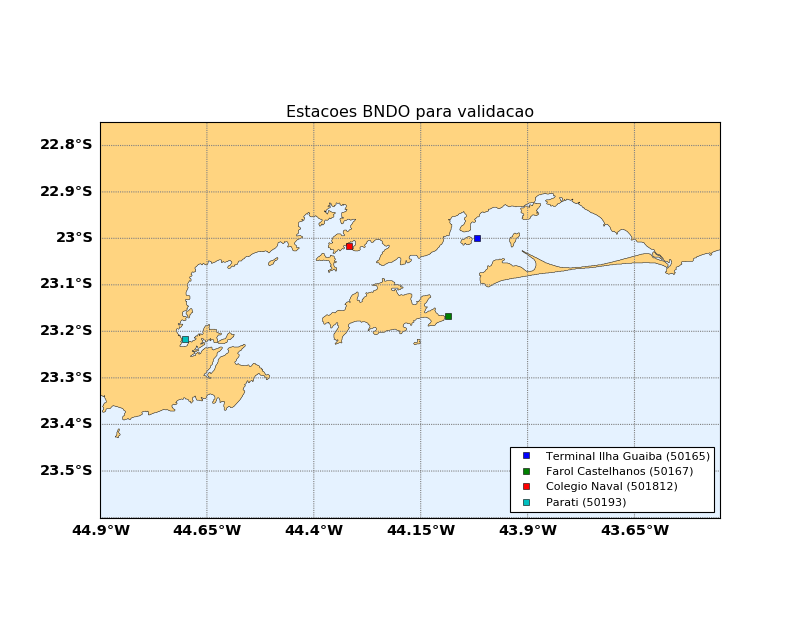

In [12]:
# criar mapa

fig, ax = plt.subplots(figsize=(10,8))
m=pickle.load(open("/home/tparente/danilo/mestrado/github/artigoTG/rotinas/bigmap.p","rb"))
m.ax = ax 

# plotar outras coisas do mapa
m.drawcoastlines(linewidth=0.4) #linha de costa em alta resolução
m.drawmapboundary(fill_color='#e5f2ff') # fill_color colore o oceano
m.fillcontinents(color='#ffd480') # colorir o continente

# definir meridianos e paralelos para plotar no mapa
meridians=np.arange(-44.9,-33.4,0.25)
parallels=np.arange(-23.6,-22.75,0.1)
# desenhar meridianos e paralelos conforme definido acima
m.drawparallels(parallels,labels=[True,False,False,True],fontsize=13,fontweight='bold',color='gray')
m.drawmeridians(meridians,labels=[True,False,False,True],fontsize=13,fontweight='bold',color='gray')

# plotar estações
for x,y,label in zip(lons,lats,name):
    m.plot(x,y,'s',label=label,latlon=True)

plt.legend(loc='lower right', numpoints=1,fontsize=10)
plt.title('Estacoes BNDO para validacao')

plt.savefig('/home/tparente/danilo/mestrado/github/artigoTG/figures/calibracao/estacoes_bndo.png')

In [198]:
# verificar a duracao de cada serie temporal da Ilha Guaiba
print('Series de Nivel do Mar para Terminal da Ilha Guaiba')

lfiles = glob.glob(DATA_DIR+'50165*')
lfiles.sort()

start = ''
final = ''
for fname in lfiles:
    name = fname.split('/')[-1]
    name = name.split('.')[0]
    name = name[10:-3]
    begin = name[:8]
    end   = name[8:]
    start = begin[:2]+'-'+begin[2:4]+'-'+begin[4:]
    final = end[:2]+'-'+end[2:4]+'-'+end[4:]
    print(start+' - '+final)

Series de Nivel do Mar para Terminal da Ilha Guaiba
01-01-1980 - 30-06-1982
01-01-1988 - 06-06-1988
01-01-1989 - 19-09-1989
01-02-1996 - 13-12-1996
01-03-1994 - 26-07-1994
01-10-2000 - 31-10-2000
02-02-1991 - 31-03-1991
02-02-1997 - 05-03-1997
02-09-1995 - 30-09-1995
02-10-1992 - 31-12-1992
02-11-1988 - 30-11-1988
04-08-1994 - 31-12-1994
05-01-1996 - 30-01-1996
06-11-1970 - 08-01-1971
09-03-1997 - 30-04-1997
10-02-1971 - 13-03-1971
13-11-2004 - 06-12-2004
17-05-1971 - 19-07-1971
18-12-1996 - 31-01-1997
26-09-1989 - 18-05-1990
27-05-1990 - 31-12-1990


In [199]:
data = pd.read_csv(lfiles[0], skiprows=11, delimiter=';',names=['nivel','x'])

data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)

In [200]:
# criar um daterange baseado nos index do arquivo importado
start = data.index[0]
end   = data.index[-1]

dtRange = pd.date_range(start=start, end=end, freq='H')

In [201]:
data.shape

(21888, 1)

In [202]:
df = pd.DataFrame({'nivel do mar [m]': data['nivel'].values/100.}, index=dtRange)

df

,nivel do mar [m]
1980-01-01 00:00:00,1.70
1980-01-01 01:00:00,2.12
1980-01-01 02:00:00,2.45
1980-01-01 03:00:00,2.67
1980-01-01 04:00:00,2.61
1980-01-01 05:00:00,2.42
1980-01-01 06:00:00,2.23
1980-01-01 07:00:00,2.01
1980-01-01 08:00:00,1.80
1980-01-01 09:00:00,1.70
